# Ardem 2.0 Topography DataSet - Locate Depth

__pyversion__==3.7   
__author__==S.Bell

Using the Ardem 2.0 Topographical Dataset, find an approximation to the bathymetry near xbt deployment locations

In [1]:
%matplotlib inline

import warnings
#remove the numpy/pandas/cython warnings
warnings.filterwarnings(action='ignore', message="numpy.dtype size changed,")

import xarray as xa
import cmocean

In [2]:
xdf = xa.open_dataset('/Users/bell/in_and_outbox/Ongoing_Analysis/MapGrids/ARDEMv2.0.nc')

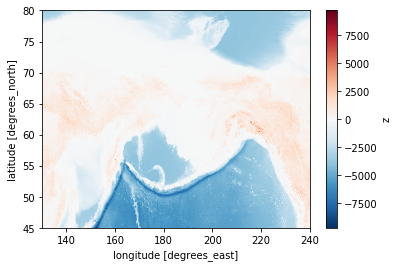

In [3]:
xdf.z.plot()

In [4]:
xdf.info()

xarray.Dataset {
dimensions:
	lat = 4201 ;
	lon = 6601 ;

variables:
	float64 lon(lon) ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:actual_range = [130. 240.] ;
	float64 lat(lat) ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
		lat:actual_range = [45. 80.] ;
	float32 z(lat, lon) ;
		z:long_name = z ;
		z:actual_range = [-9677.          5965.22265625] ;

// global attributes:
	:Conventions = COARDS, CF-1.5 ;
	:title = ARDEMblend.grd ;
	:history = grdblend ARDEM.grd ibcao_subsetA.grd ibcao_subsetB.grd ibcao_subsetC.grd ibcao_subsetD.grd ibcao_subsetE.grd -Co -GARDEMblend.grd -Rg130/240/45/80 -I60s/30s ;
	:GMT_version = 5.1.0 (r12452) [64-bit] ;
}

In [5]:
lat,lon = [70.69167259999999,-167.1781684]
'''

'''
zval = xdf.sel(lat=lat,lon=lon+360, method='nearest')
print(zval)

print("Depth is {}".format(zval.z.data))

<xarray.Dataset>
Dimensions:  ()
Coordinates:
    lon      float64 192.8
    lat      float64 70.69
Data variables:
    z        float32 ...
Attributes:
    Conventions:  COARDS, CF-1.5
    title:        ARDEMblend.grd
    history:      grdblend ARDEM.grd ibcao_subsetA.grd ibcao_subsetB.grd ibca...
    GMT_version:  5.1.0 (r12452) [64-bit]
Depth is -53.00005340576172


In [6]:
bathy_sub = xdf.sel(lat=slice(64,67),lon=slice(185,195))

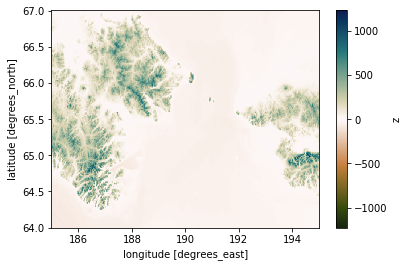

In [7]:
bathy_sub.z.plot(cmap=cmocean.cm.tarn)